### This notebook processes this project's hypothesis 3: 
#### We expect some co-integration between waste generation and forest cover depletion. We will explore the relationship between the two to draw some insights. We will strive to use both WB and OECD data for this.

In [41]:
%matplotlib inline

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import datetime
from IPython.display import display, HTML
import Hypothesis_3_func as hyp

##### Import the dataframe

In [42]:
clean_df = pd.read_csv("clean_df.csv")

In [43]:
pd.set_option('display.max_columns', None)
clean_df.head()

,Unnamed: 0,Year,COU,Country,Composting%,Disposal%,Landfill%,Material_recovery%,Recovery%,Recycling%,Amt_for_recovery_operations,Composting,Electronic_waste,Household_waste,Landfill,Municipal_waste_generated,Municipal_waste_generated_percapita,Municipal_waste_generated_1990,Municipal_waste_generated_2000,Municipal_waste_treated,Recycling,Total_Incineration,Waste_from_households,Country_y,CO2_emissions_percapita,Female_education_attainment_bach,Male_education_attainment_bach,Total_education_attainment_bach,Energy_use_percapita,Forest_area,GDP_2015_USD,GDP_growth%,GDP_percapita_2015_USD,GDP_percapita_growth%,Education_expense_%_of_gdp,Education_expense_%_of_total_exp,Population_density,Population_growth%,Population_female,Population_female_%,Population_total,Poverty_headcount%_ppp,Poverty_headcount%_national_line,Population_urban%,Population_urban_growth%
0,0,1990,AUT,Austria,23.171,56.277,56.277,34.529,43.723,11.358,1536.0,814.0,NaN,NaN,1977.0,3204.0,414.814,100.0,68.963,3513.0,399.0,312.0,2504.0,Austria,7.589364,NaN,NaN,NaN,3240.111359,37756.7,2.406290e+11,4.345641,31340.681293,3.553548,4.95725,11.513110,93.042293,0.762002,4005232,52.166067,7677850,NaN,NaN,62.960,0.332494
1,1,1990,BEL,Belgium,5.983,66.751,43.853,11.108,33.249,5.125,1317.0,237.0,NaN,NaN,1737.0,3436.0,343.375,100.0,71.131,3961.0,203.0,1784.0,2884.0,Belgium,10.966775,NaN,NaN,NaN,4809.867268,7632.0,2.934562e+11,3.137402,29441.662148,2.830268,NaN,NaN,NaN,0.298236,5090672,51.073323,9967379,NaN,NaN,96.377,0.386473
2,2,1990,CHE,Switzerland,6.341,22.680,22.680,28.547,77.320,22.207,3170.6,260.0,NaN,NaN,930.0,4100.6,616.366,100.0,86.675,4100.6,910.6,2000.0,2733.7,Switzerland,6.452219,NaN,NaN,NaN,3627.692811,11535.0,4.714249e+11,3.674626,70199.323900,2.615466,4.38825,17.181641,169.888411,1.026873,3437405,51.185991,6715519,NaN,NaN,73.926,0.945759
3,3,1990,CHN,China (People's Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67668.0,NaN,100.0,57.254,NaN,NaN,NaN,NaN,China,1.914543,NaN,NaN,NaN,766.995329,1571405.9,1.027377e+12,3.920251,905.030859,2.406559,NaN,NaN,120.448249,1.467303,552721134,48.689961,1135185000,72.0,NaN,26.442,4.309678
4,4,1990,DEU,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49857.0,630.670,100.0,94.408,NaN,NaN,NaN,NaN,Germany,12.026609,NaN,NaN,NaN,4421.364531,113000.0,2.342139e+12,5.255006,29485.709974,4.351639,NaN,NaN,227.517054,0.861969,41104568,51.747451,79433029,NaN,NaN,73.118,1.056365


In [44]:
#subset df with only required columns
#time trend plots
#hist plot
#bar graphs
#box plots for summary stats
#corr plot
#pairwise plot
#correlation matrix
#corr test (pearson)
#conclusion

In [45]:
clean_df.columns

Index(['Unnamed: 0', 'Year', 'COU', 'Country', 'Composting%', 'Disposal%',
       'Landfill%', 'Material_recovery%', 'Recovery%', 'Recycling%',
       'Amt_for_recovery_operations', 'Composting', 'Electronic_waste',
       'Household_waste', 'Landfill', 'Municipal_waste_generated',
       'Municipal_waste_generated_percapita', 'Municipal_waste_generated_1990',
       'Municipal_waste_generated_2000', 'Municipal_waste_treated',
       'Recycling', 'Total_Incineration', 'Waste_from_households', 'Country_y',
       'CO2_emissions_percapita', 'Female_education_attainment_bach',
       'Male_education_attainment_bach', 'Total_education_attainment_bach',
       'Energy_use_percapita', 'Forest_area', 'GDP_2015_USD', 'GDP_growth%',
       'GDP_percapita_2015_USD', 'GDP_percapita_growth%',
       'Education_expense_%_of_gdp', 'Education_expense_%_of_total_exp',
       'Population_density', 'Population_growth%', 'Population_female',
       'Population_female_%', 'Population_total', 'Poverty_head

In [46]:
clean_df["Country"].unique()

array(['Austria', 'Belgium', 'Switzerland',
       "China (People's Republic of)", 'Germany', 'Spain',
       'United Kingdom', 'Greece', 'Hungary', 'Italy', 'Japan', 'Korea',
       'Luxembourg', 'Netherlands', 'Norway', 'New Zealand', 'Poland',
       'Portugal', 'Sweden', 'United States', 'Mexico', 'Türkiye',
       'Australia', 'Finland', 'France', 'Slovak Republic', 'Denmark',
       'Czech Republic', 'Cyprus', 'Estonia', 'Ireland', 'Iceland',
       'Lithuania', 'Latvia', 'Slovenia', 'Canada', 'Russia', 'Brazil',
       'Chile', 'Israel', 'Indonesia', 'Colombia', 'Costa Rica', 'India'],
      dtype=object)

#### Cleaning Data further for my analysis

Removing countries where columns "Recovery%" or "Municipal_waste_generated_percapita" has all null or nan values
#Population_total, Municipal_waste_generated_percapita, Forest_area

In [48]:
# Getting the required columns only
df1 = clean_df[["Country", "Population_total", "Municipal_waste_generated_percapita", "Forest_area", "Year"]]
df1.head()

,Country,Population_total,Municipal_waste_generated_percapita,Forest_area,Year
0,Austria,7677850,414.814,37756.7,1990
1,Belgium,9967379,343.375,7632.0,1990
2,Switzerland,6715519,616.366,11535.0,1990
3,China (People's Republic of),1135185000,NaN,1571405.9,1990
4,Germany,79433029,630.670,113000.0,1990


In [49]:
df1 = hyp.clean_data_hyp3(df1)

In [50]:
df1.head()

,Country,Population_total,Municipal_waste_generated_percapita,Forest_area,Year
0,Austria,7677850,414.814,37756.7,1990
1,Belgium,9967379,343.375,7632.0,1990
2,Switzerland,6715519,616.366,11535.0,1990
4,Germany,79433029,630.670,113000.0,1990
5,Spain,38867322,NaN,139046.6,1990


### Time Series Trend for Forest Cover

In [52]:
def time_series_hyp3(ts1, variable):
    
    fig, ax = plt.subplots(figsize=(10,5))
    for key1 in ts1["Country"].unique():
        ts2 = ts1[ts1["Country"]==key1]
        x1 = ts2["Year"]
        y1 = ts2[variable]
        plt.plot(x1, y1, label = key1)    


    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    plt.ylabel(variable)
    
    plt.title(str(variable + " as a function of time"))
    return fig, ax
    

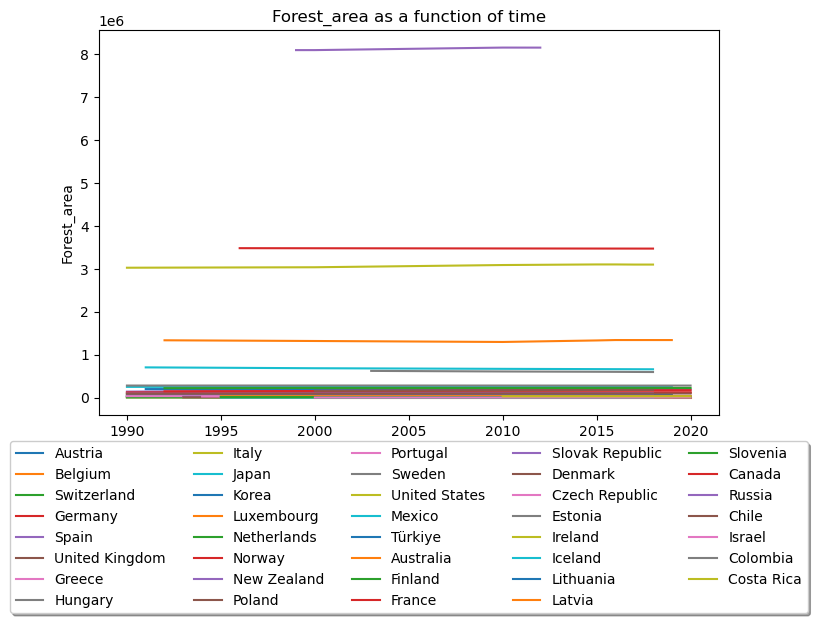

In [53]:
fig, ax = time_series_hyp3(df1.copy(deep = True), "Forest_area")
plt.show()

Forest_area as a function of time


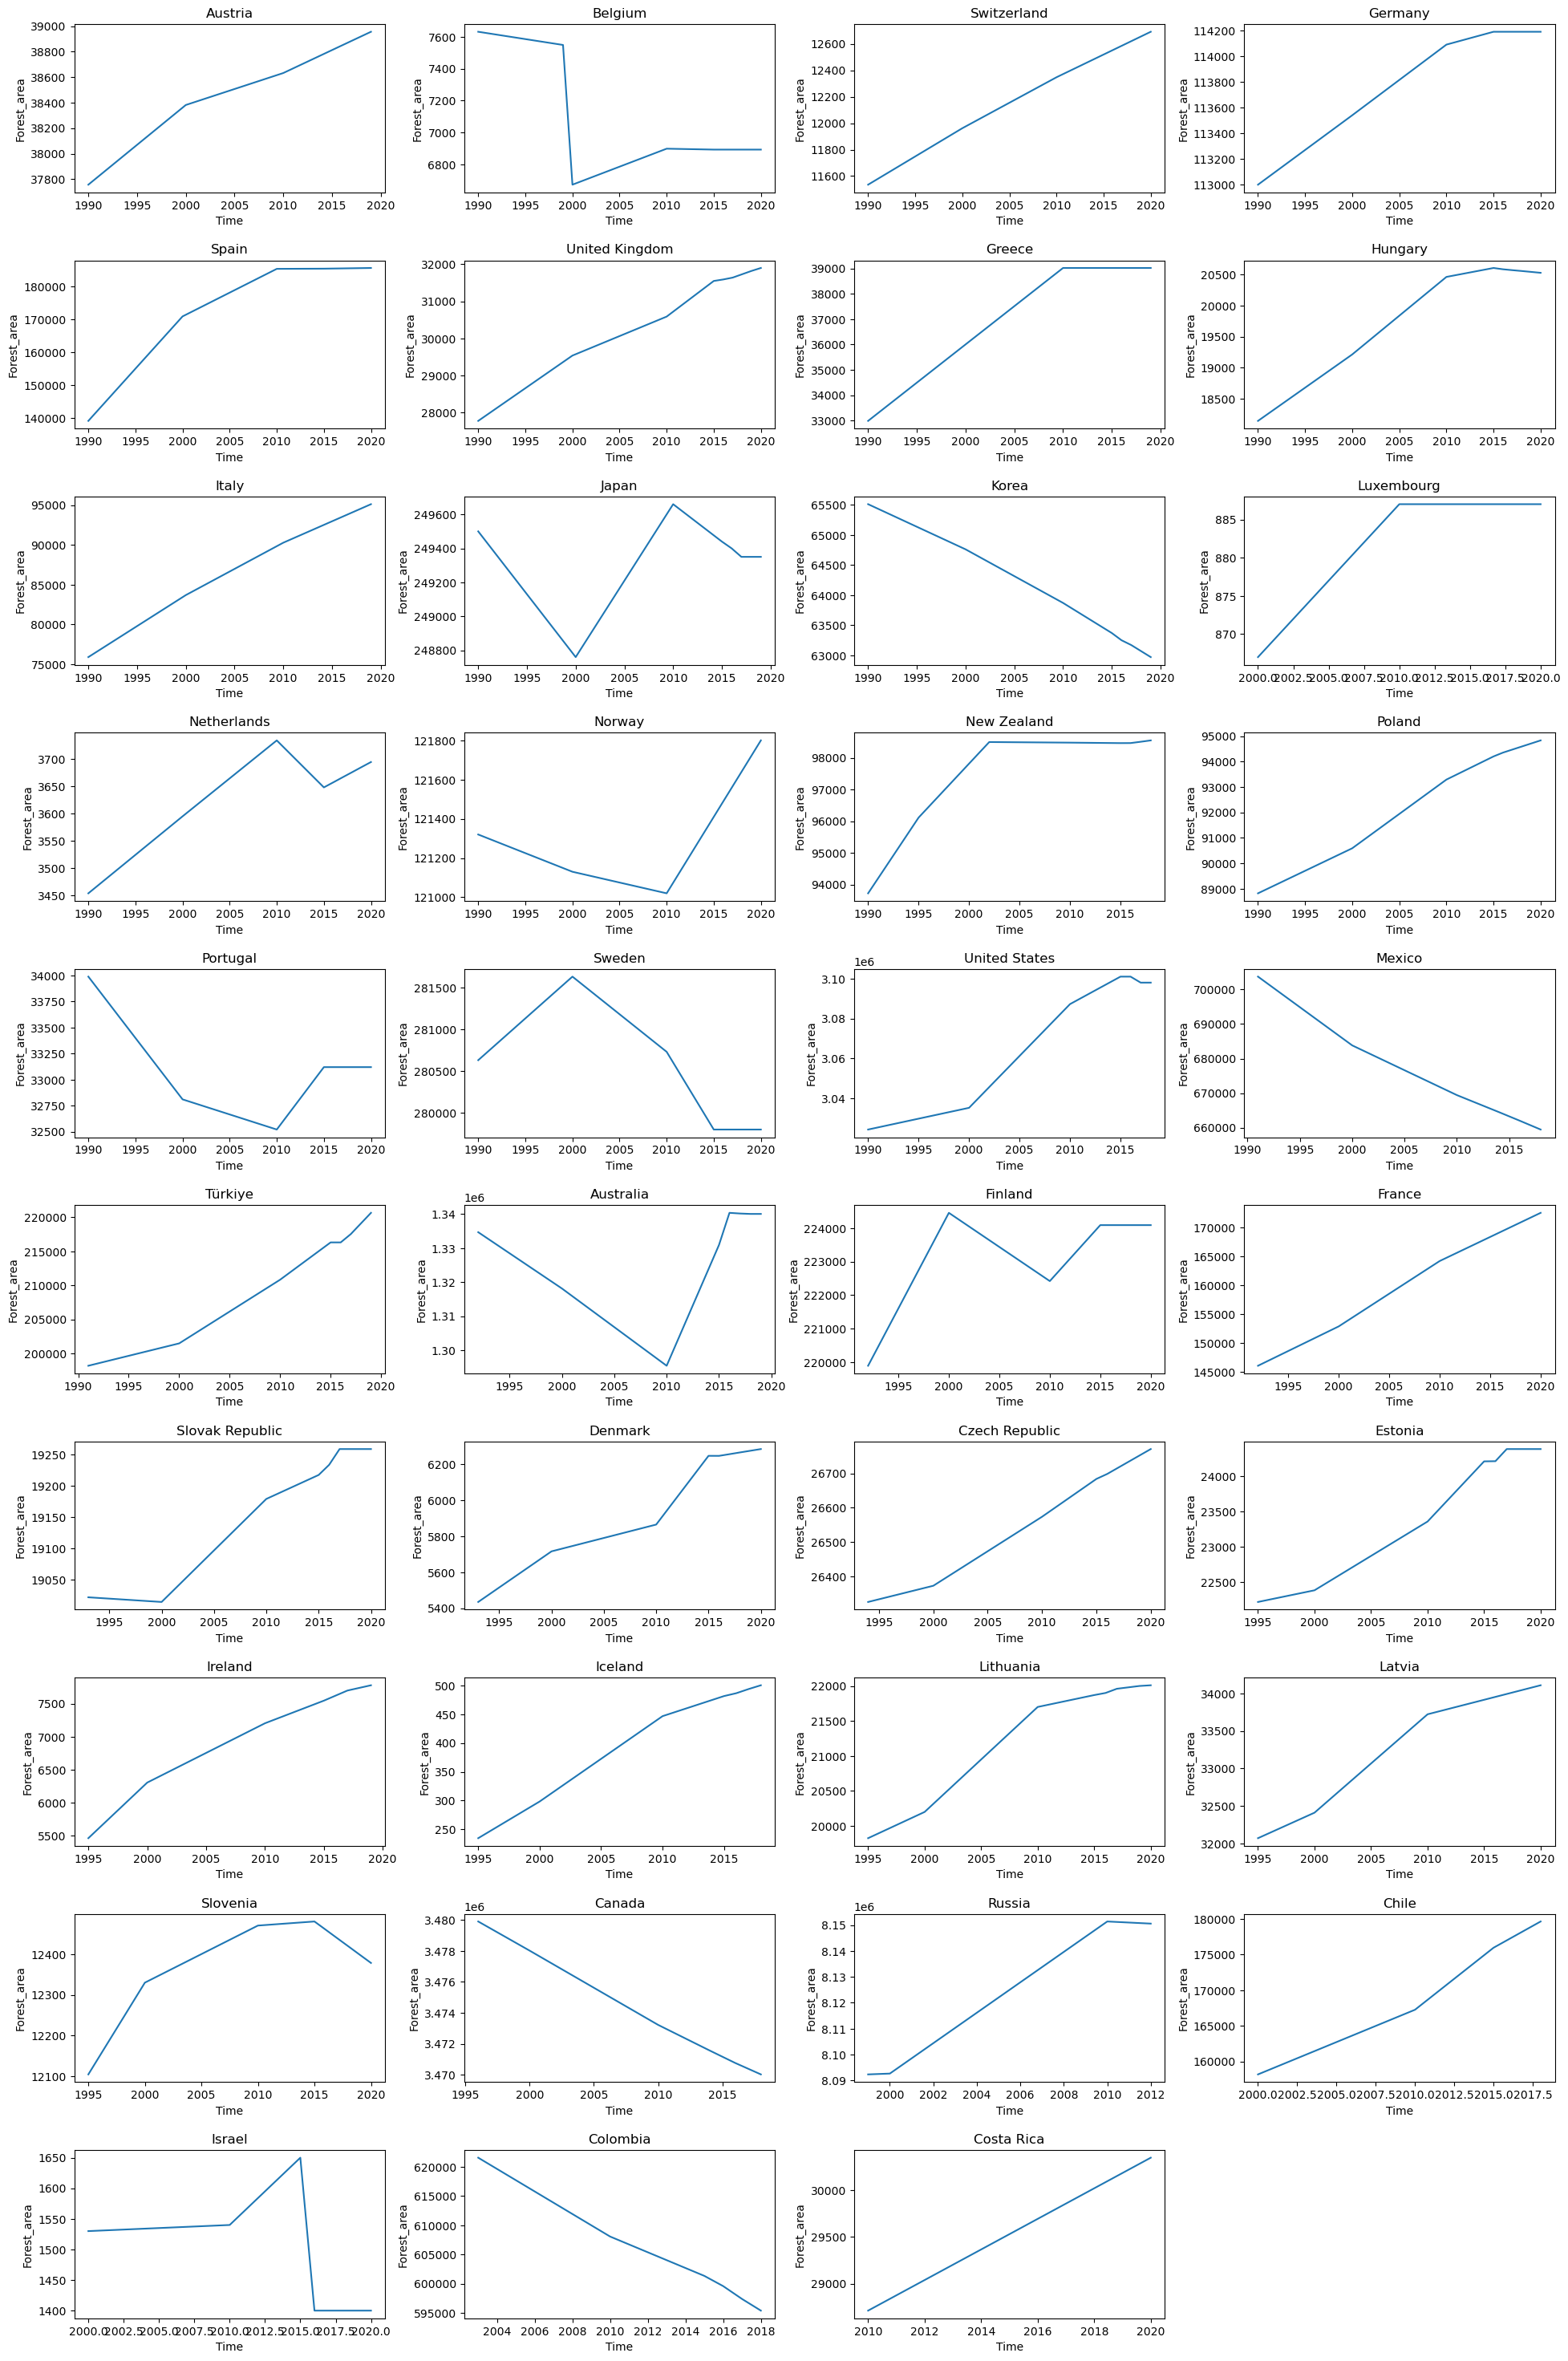

In [54]:
fig, axs = hyp.time_series_subplots(df1.copy(deep = True), "Forest_area")
print("Forest_area as a function of time")
plt.show()


### Time Series Trend for Municipal waste generated per capita

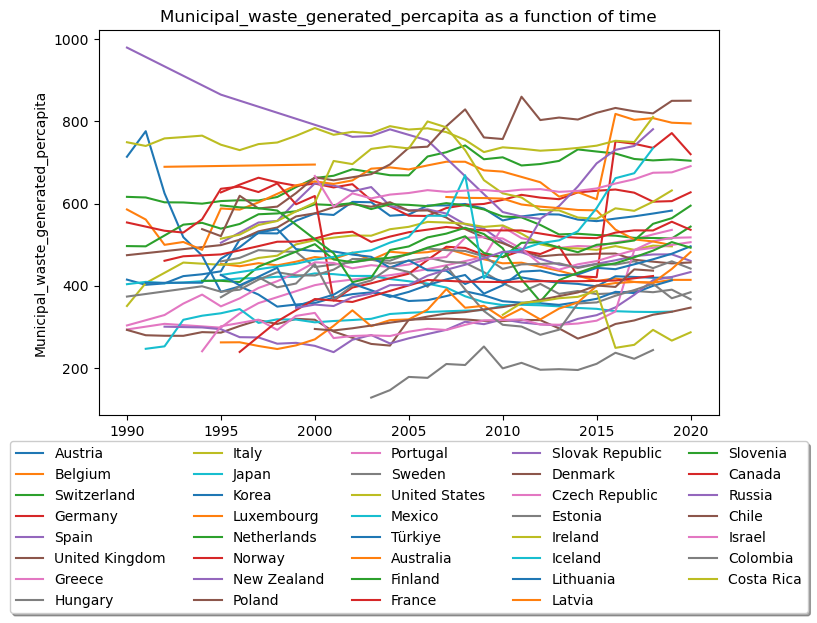

In [55]:
fig, ax = hyp.time_series(df1.copy(deep = True), "Municipal_waste_generated_percapita")
plt.show()

Municipal_waste_generated_percapita as a function of time


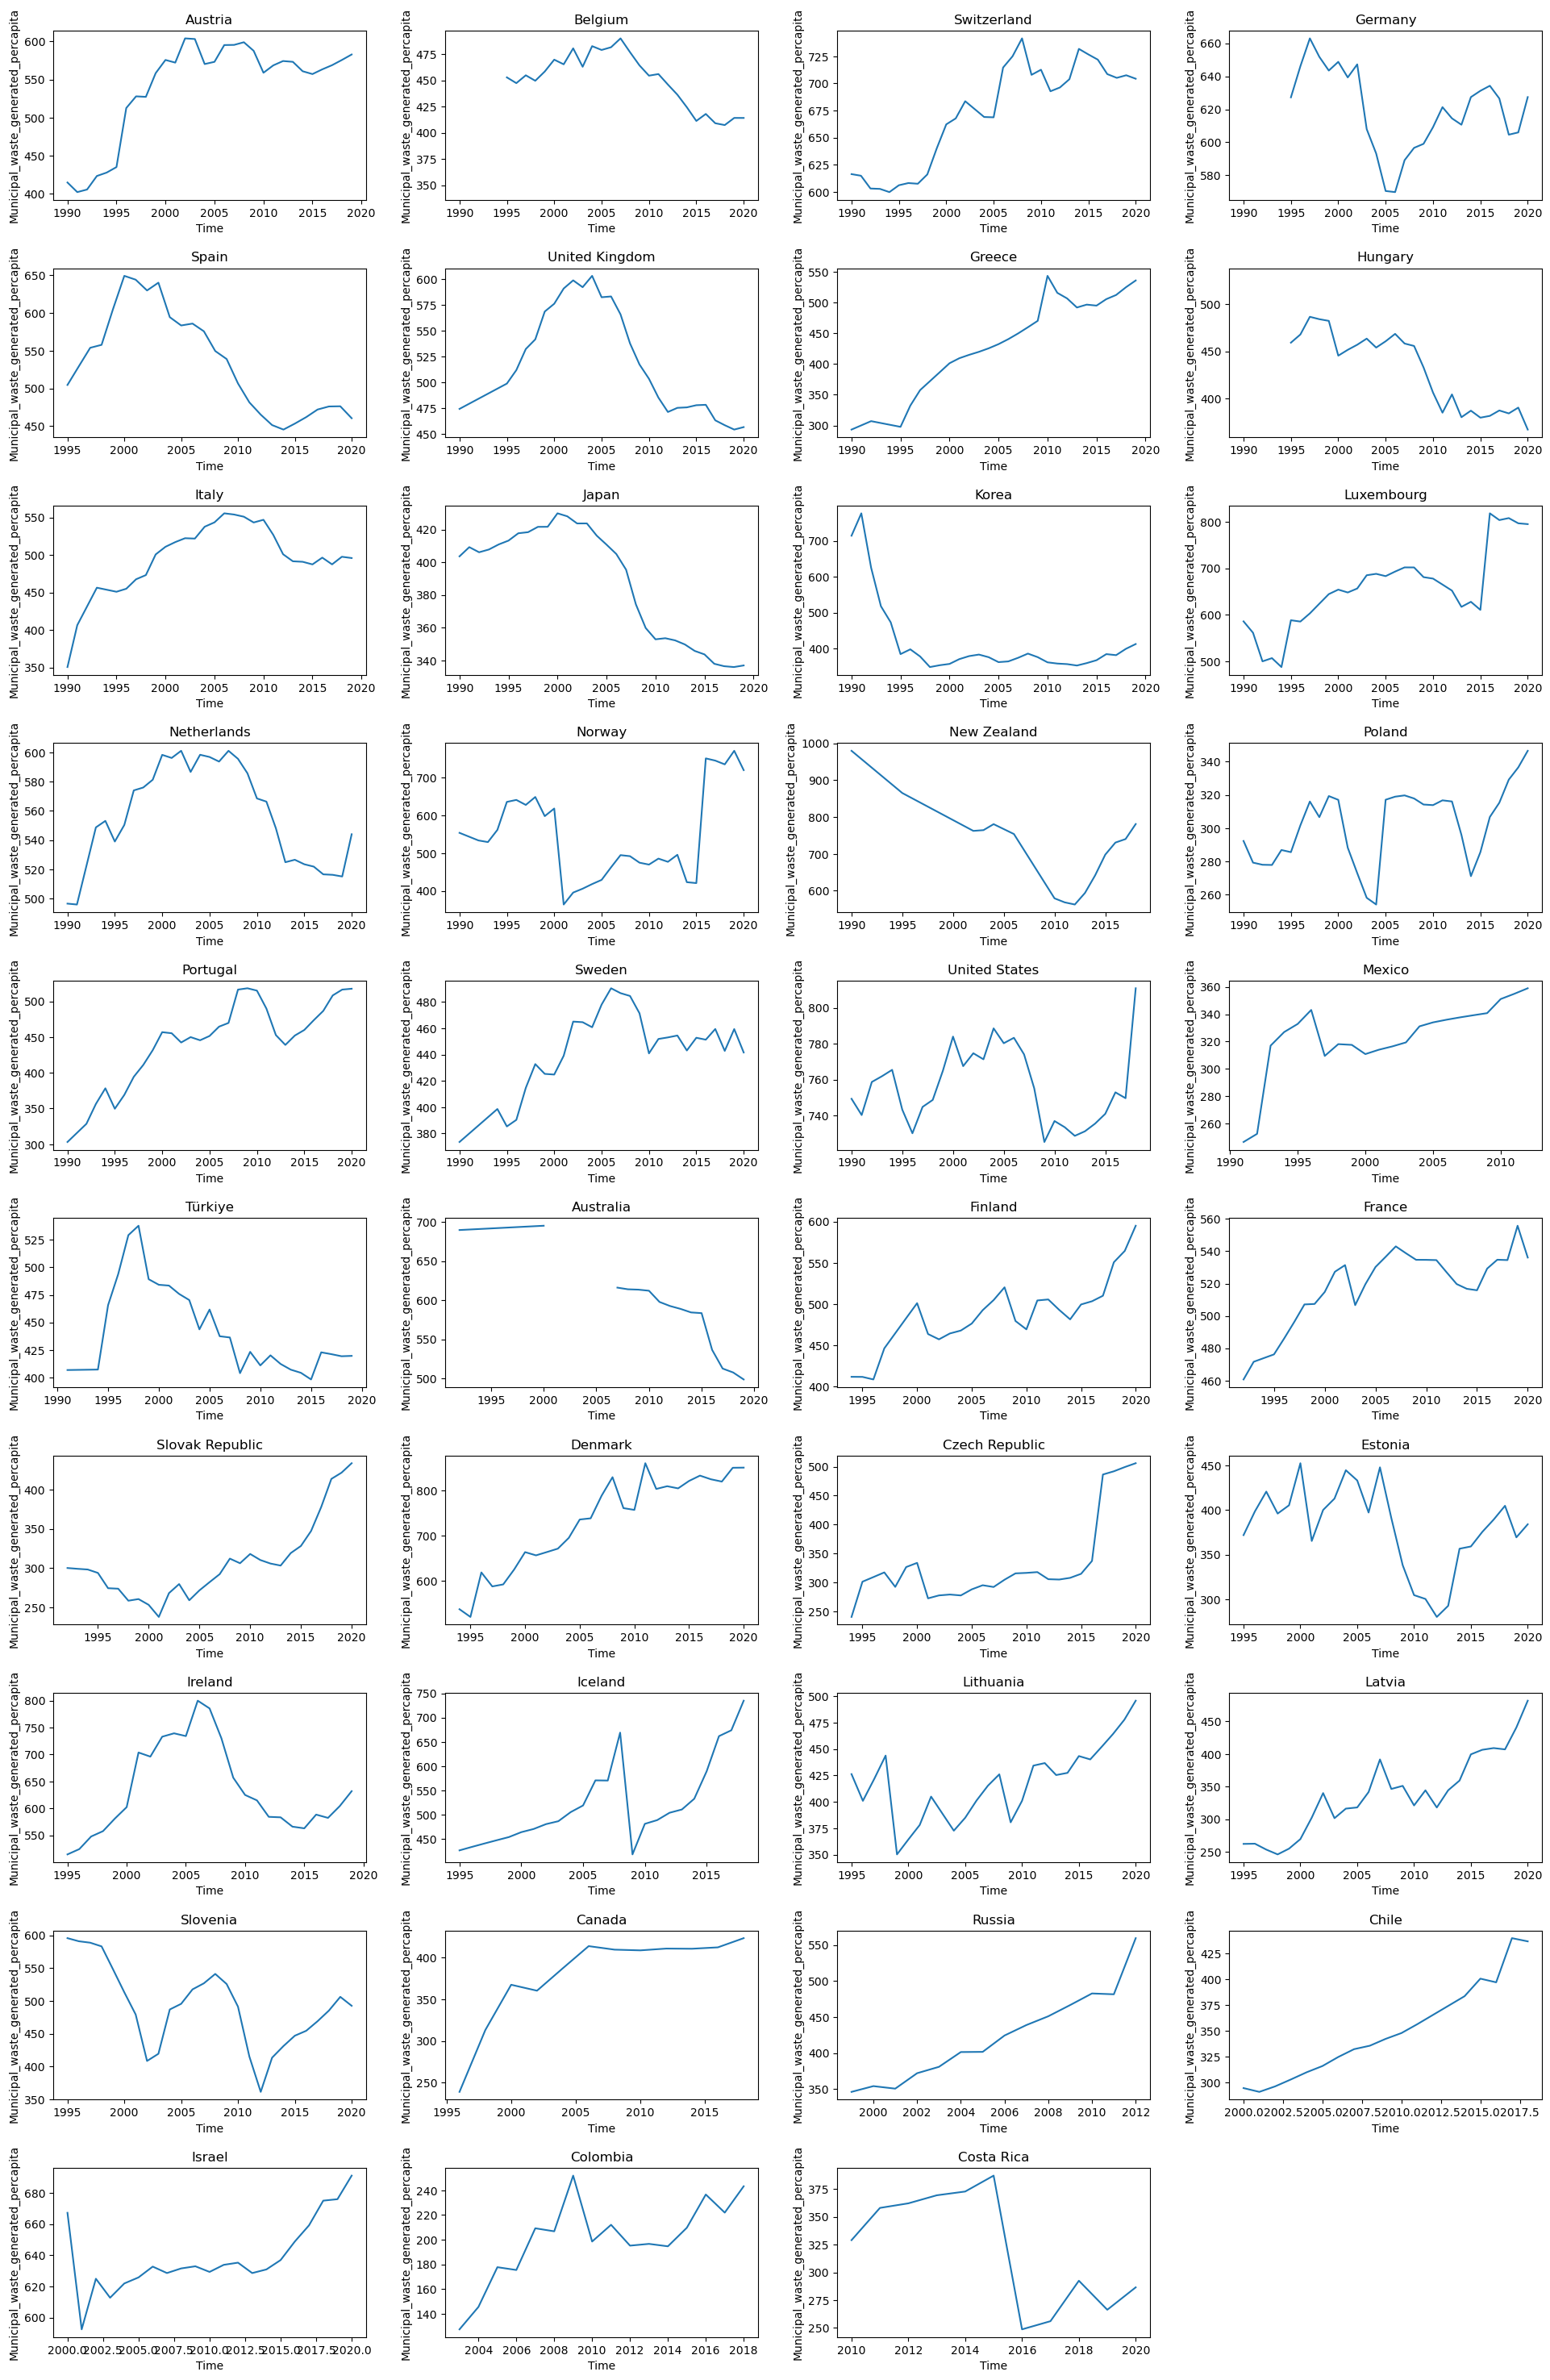

In [56]:
fig, axs = hyp.time_series_subplots(df1.copy(deep = True), "Municipal_waste_generated_percapita")
print("Municipal_waste_generated_percapita as a function of time")
plt.show()


### Correlation between Forest_area and Municipal_waste_generated_percapita for each country

In [57]:
corr_list = hyp.calculate_correlation_hyp3(df1.copy(deep = True))
cnt = 1
for i1 in corr_list:
    print(i1, end = " ")
    if cnt%3==0:
        print(" ")
    cnt+=1

['Austria', 0.8267992985009448] ['Belgium', -0.32137698966537287] ['Switzerland', 0.8877475252297822]  
['Germany', -0.4231526623454968] ['Spain', -0.4915348370281774] ['United Kingdom', -0.5112158544656723]  
['Greece', 0.9738075437531841] ['Hungary', -0.8801122563126719] ['Italy', 0.5720476058690912]  
['Japan', -0.7625426749049937] ['Korea', 0.542839848774776] ['Luxembourg', 0.3241337694262421]  
['Netherlands', 0.2724324625485116] ['Norway', 0.7115270910282114] ['New Zealand', -0.7170785712380201]  
['Poland', 0.46319362920514984] ['Portugal', -0.7632887197486924] ['Sweden', -0.14839984061899697]  
['United States', -0.1602115177906036] ['Mexico', -0.7418960888089812] ['Türkiye', -0.6429419588502957]  
['Australia', -0.5044246869426022] ['Finland', 0.6118293071396502] ['France', 0.7739140538610905]  
['Slovak Republic', 0.8286449319016433] ['Denmark', 0.8842282902453502] ['Czech Republic', 0.6965843028807964]  
['Estonia', -0.4114976909492893] ['Ireland', 0.12634072411233208] ['Ice

#### Based on pearson corrrelation we group the countries into 3 groups and observe their trends
* Groups are made on the basis of pearson correlation values
* Group 1 corr<0.-25 (this shows that one variable increases while other decreases)
* Group 2 corr>0.25 (this shows that both variables increase)
* Group 3 -0.25<corr<0.25 (this shows variables show less correlation)

In [58]:
# Groups are made on the basis of pearson correlation values
# Group 1 corr<0.-25 (this shows that one variable increases while other decreases)
# Group 2 corr>0.25 (this shows that both variables increase)
# Group 3 -0.25<corr<0.25 (this shows variables show less correlation)

corr_list1, corr_list2, corr_list3 = hyp.country_groups(corr_list)

In [59]:
corr_list1


[['Belgium', -0.32137698966537287],
 ['Germany', -0.4231526623454968],
 ['Spain', -0.4915348370281774],
 ['United Kingdom', -0.5112158544656723],
 ['Hungary', -0.8801122563126719],
 ['Japan', -0.7625426749049937],
 ['New Zealand', -0.7170785712380201],
 ['Portugal', -0.7632887197486924],
 ['Mexico', -0.7418960888089812],
 ['Türkiye', -0.6429419588502957],
 ['Australia', -0.5044246869426022],
 ['Estonia', -0.4114976909492893],
 ['Slovenia', -0.7296036243511248],
 ['Canada', -0.8310885900341267],
 ['Israel', -0.6504392497587619],
 ['Colombia', -0.7473912789415208],
 ['Costa Rica', -0.6614508410166628]]

In [60]:
corr_list2

[['Austria', 0.8267992985009448],
 ['Switzerland', 0.8877475252297822],
 ['Greece', 0.9738075437531841],
 ['Italy', 0.5720476058690912],
 ['Korea', 0.542839848774776],
 ['Luxembourg', 0.3241337694262421],
 ['Netherlands', 0.2724324625485116],
 ['Norway', 0.7115270910282114],
 ['Poland', 0.46319362920514984],
 ['Finland', 0.6118293071396502],
 ['France', 0.7739140538610905],
 ['Slovak Republic', 0.8286449319016433],
 ['Denmark', 0.8842282902453502],
 ['Czech Republic', 0.6965843028807964],
 ['Iceland', 0.6904836125602224],
 ['Lithuania', 0.5848108046158805],
 ['Latvia', 0.8653932327182255],
 ['Russia', 0.939914991075469],
 ['Chile', 0.9882282845417805]]

In [61]:
corr_list3

[['Sweden', -0.14839984061899697],
 ['United States', -0.1602115177906036],
 ['Ireland', 0.12634072411233208]]

### Analysing different country groups

#### Group 1

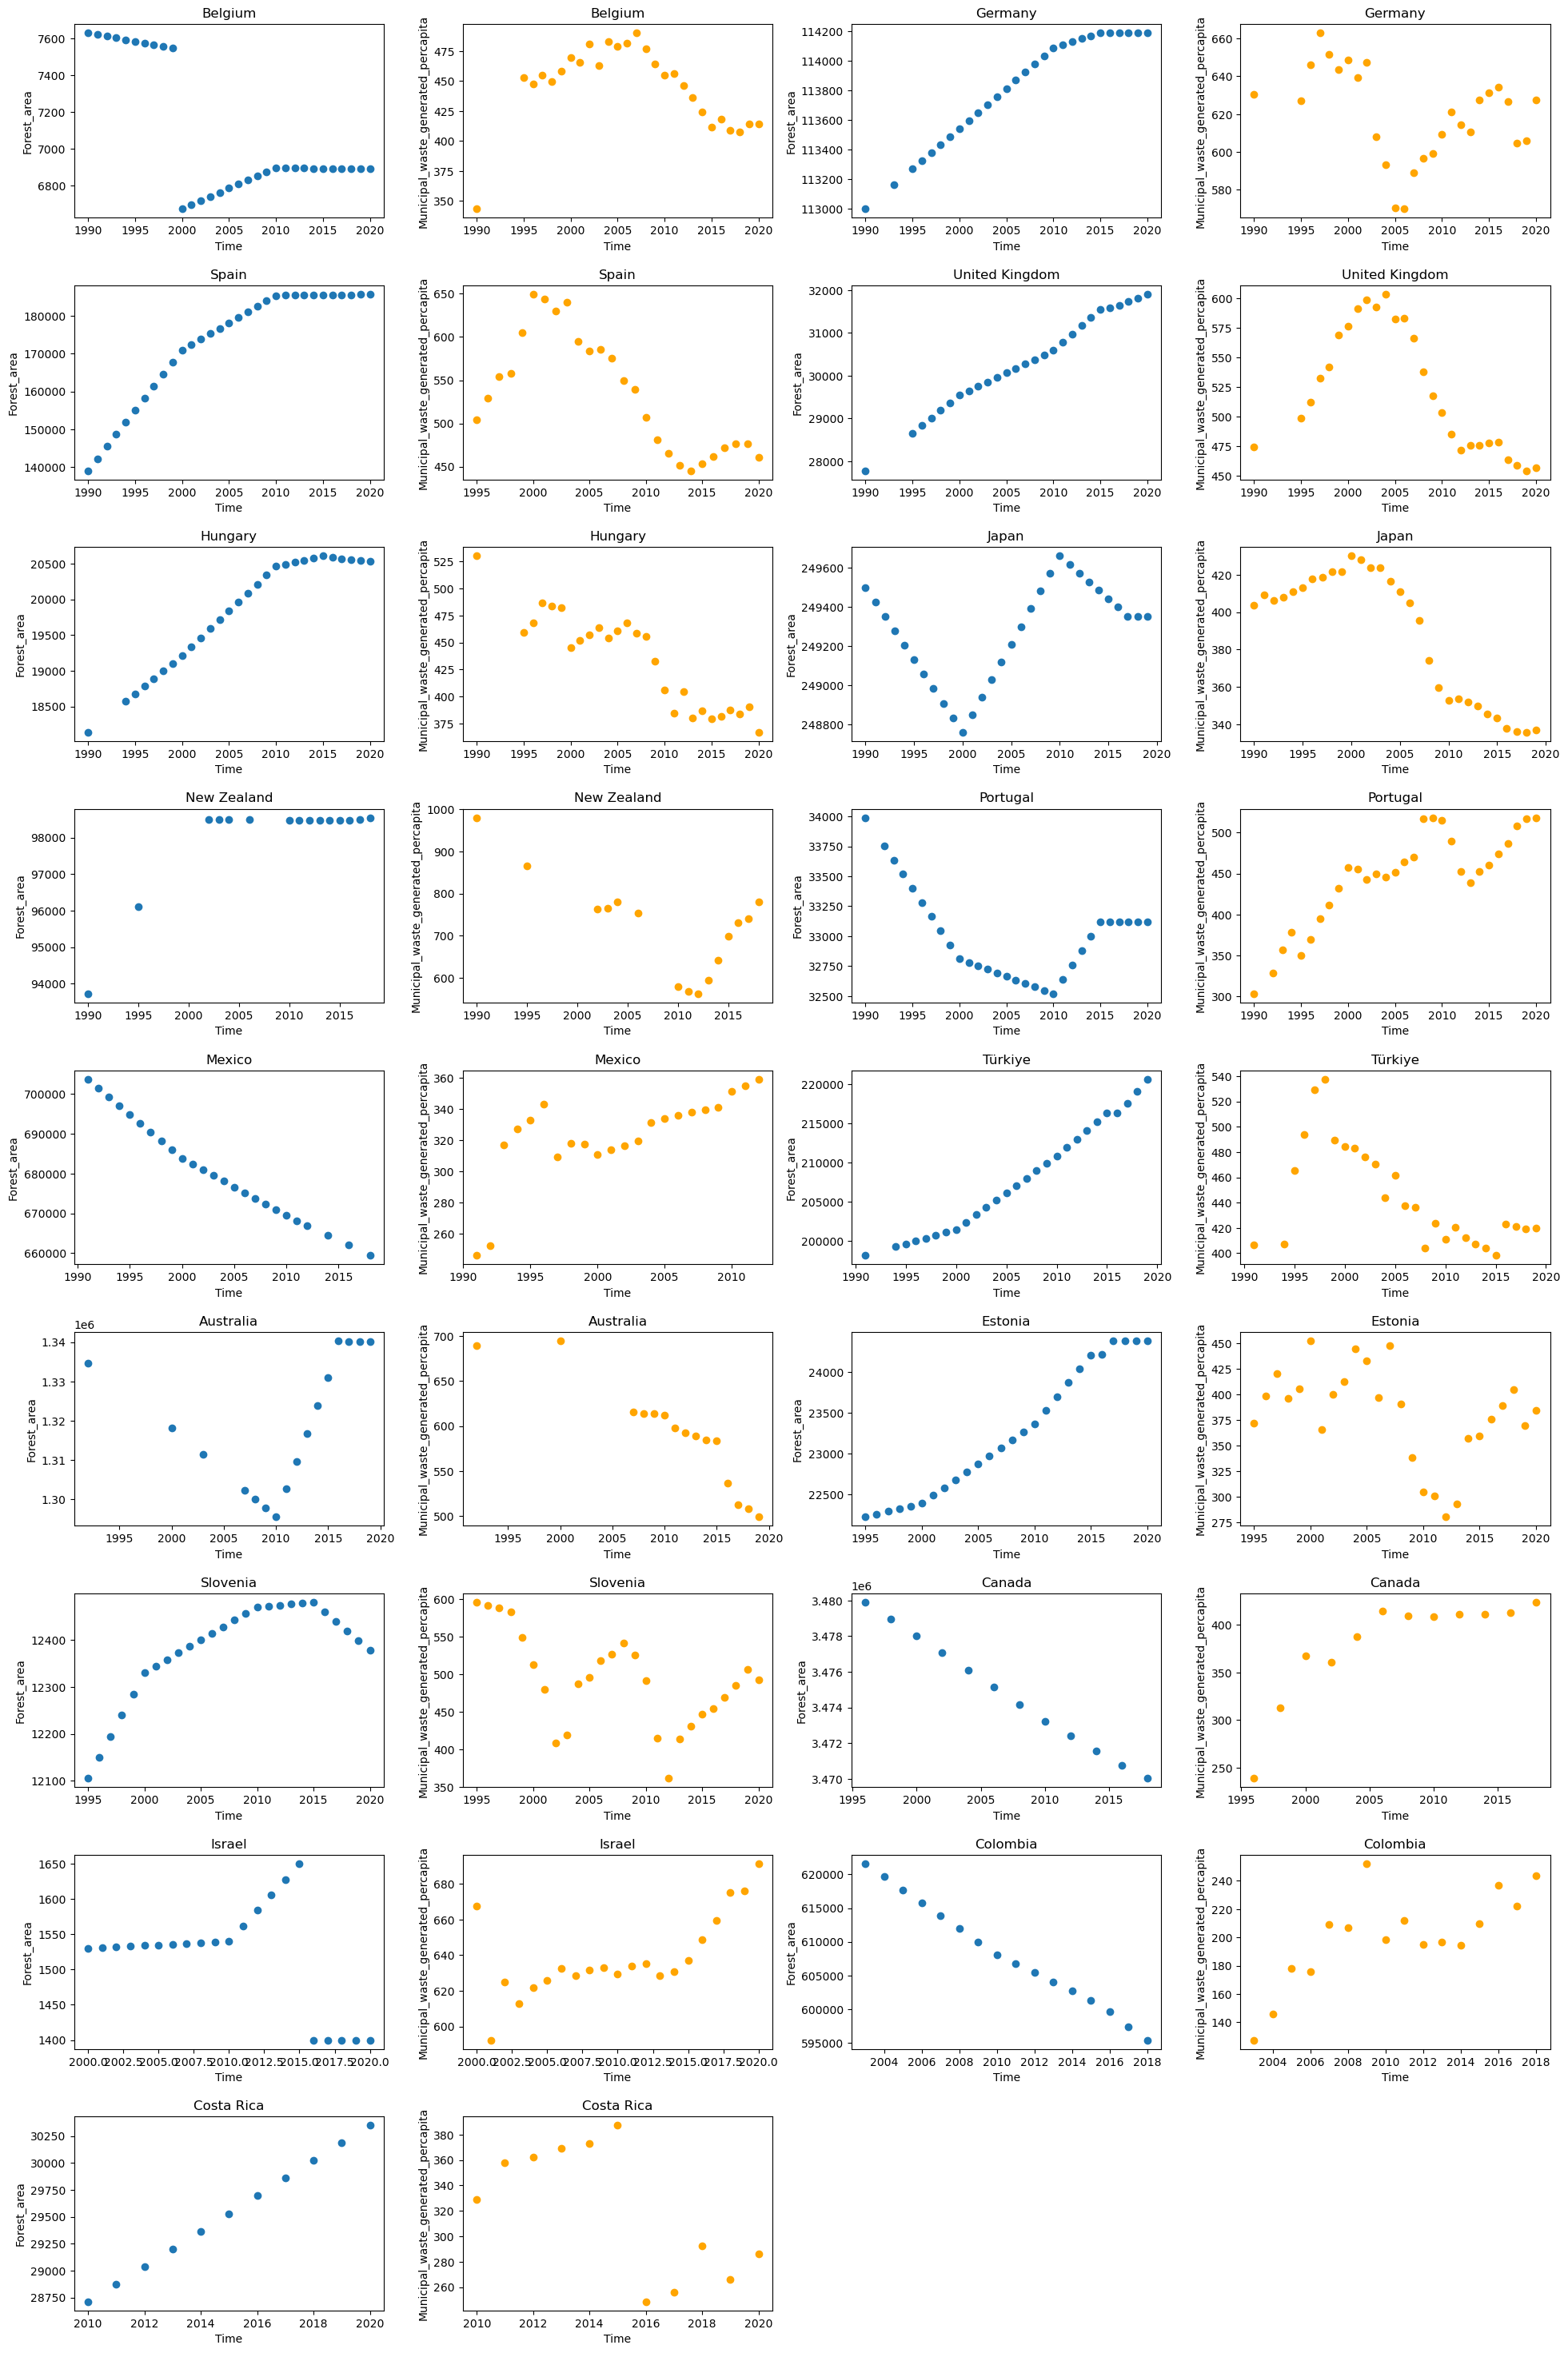

In [70]:
fig, axs = hyp.group_time_series_hyp3(df1, corr_list1, (20,30))
plt.show()

#### Group 2

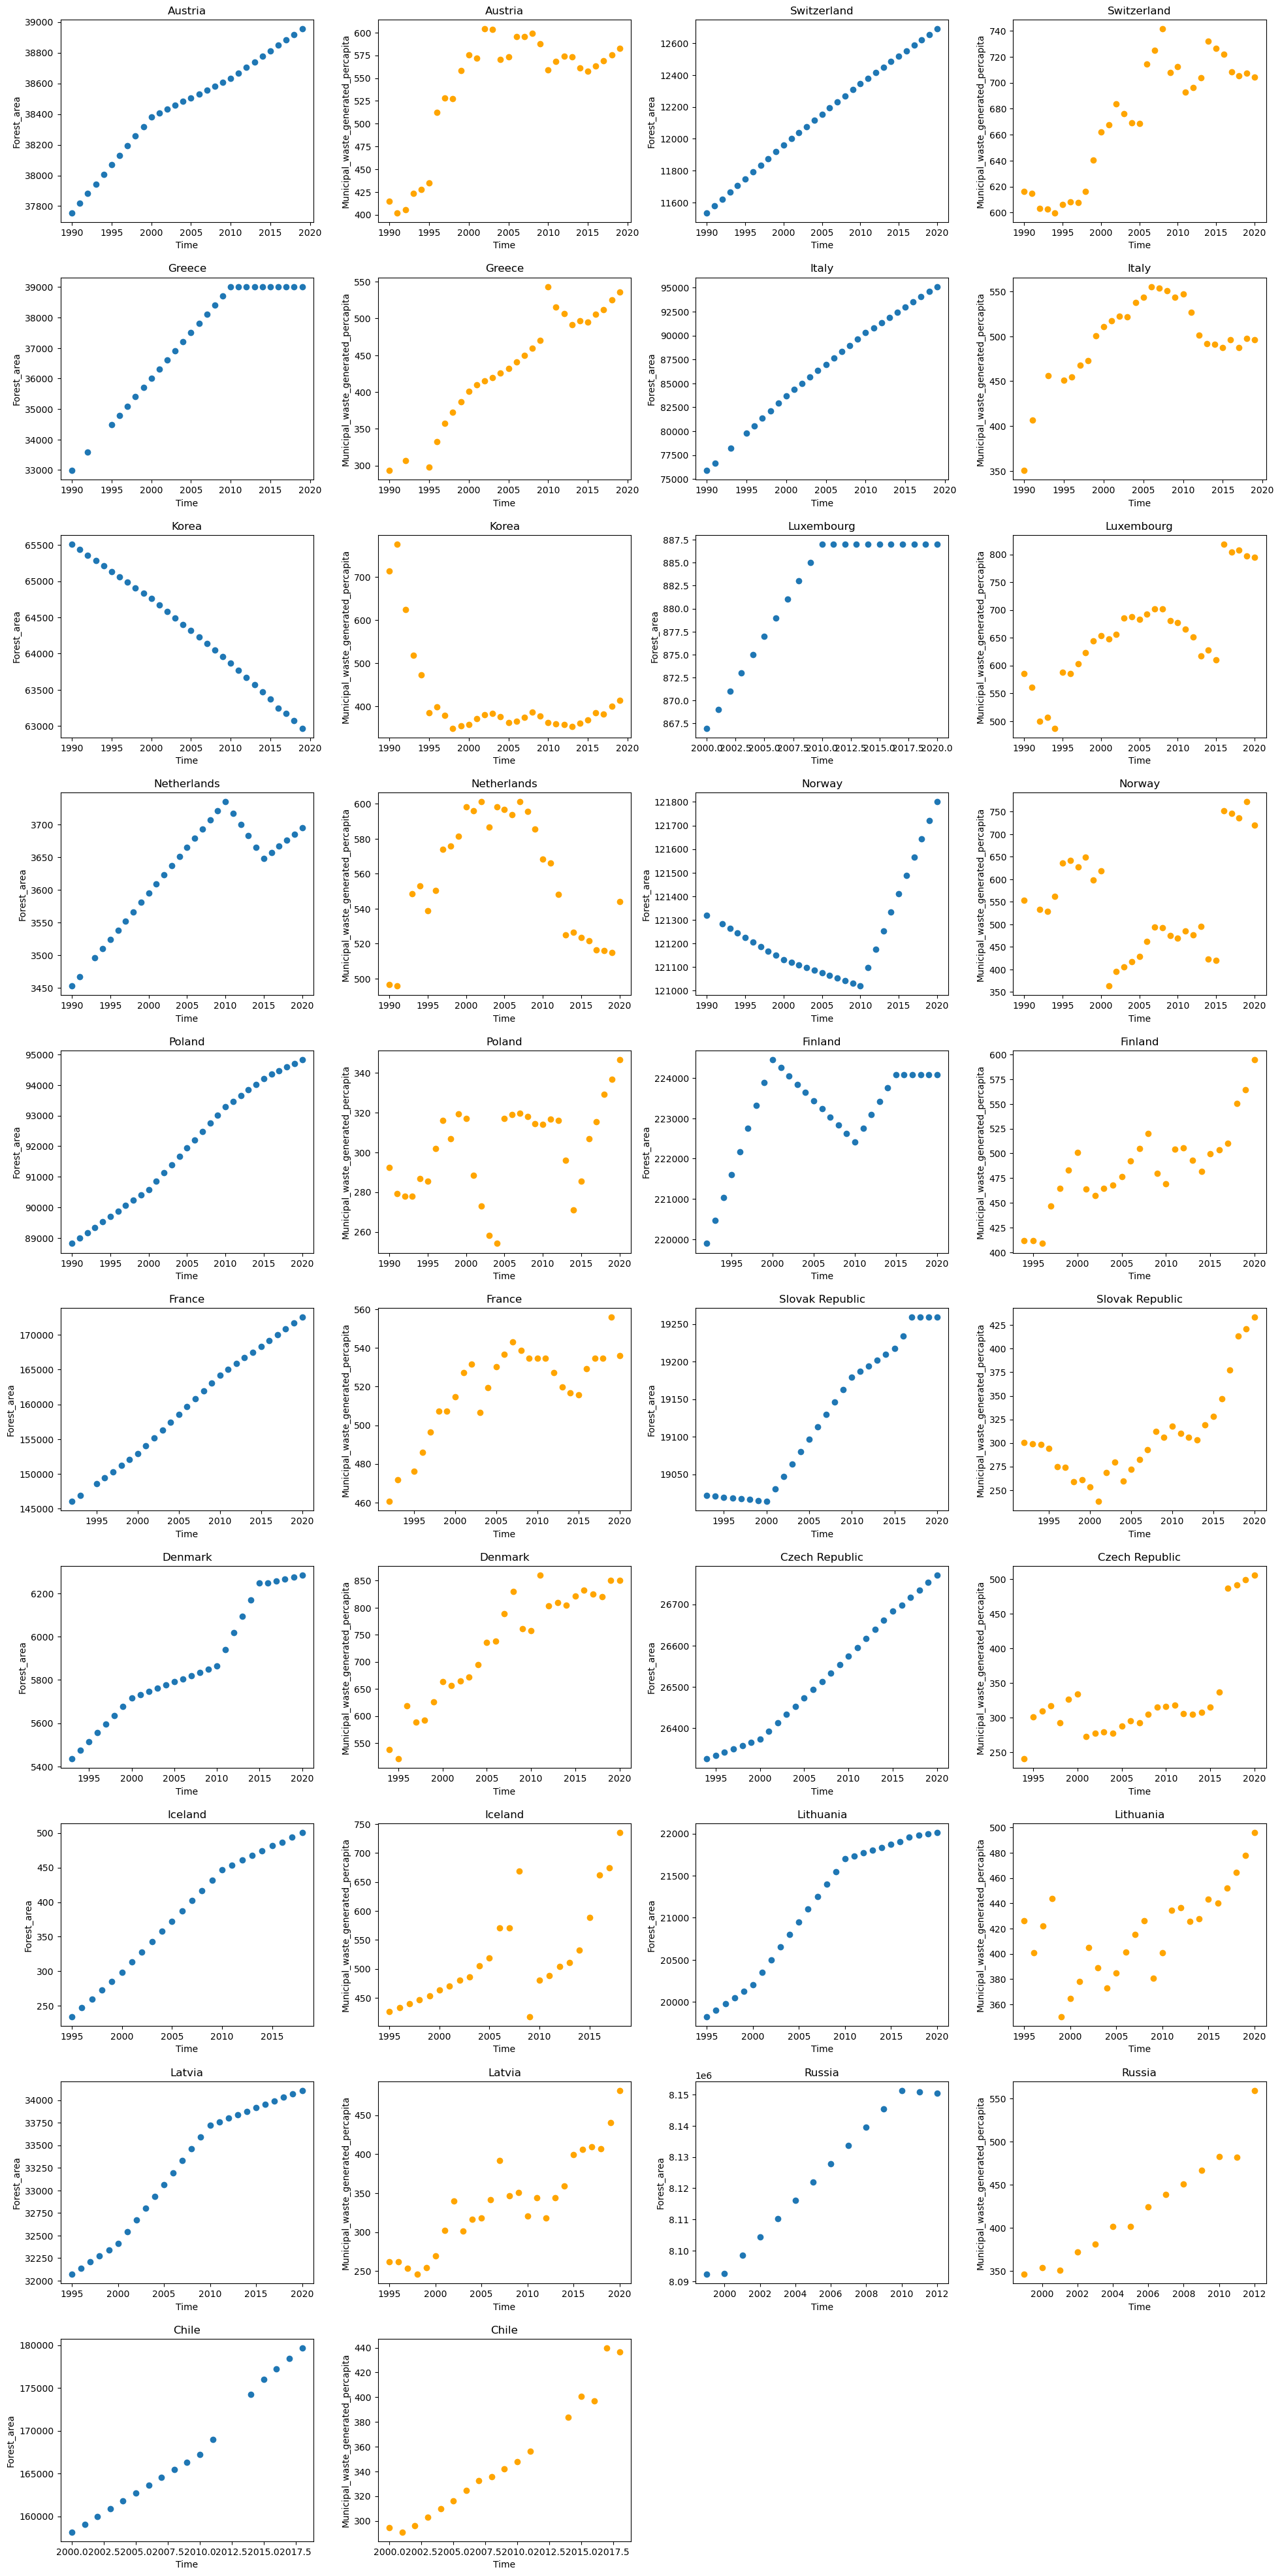

In [67]:
fig, axs = hyp.group_time_series_hyp3(df1, corr_list2, (20,40))
plt.show()

#### Group 3

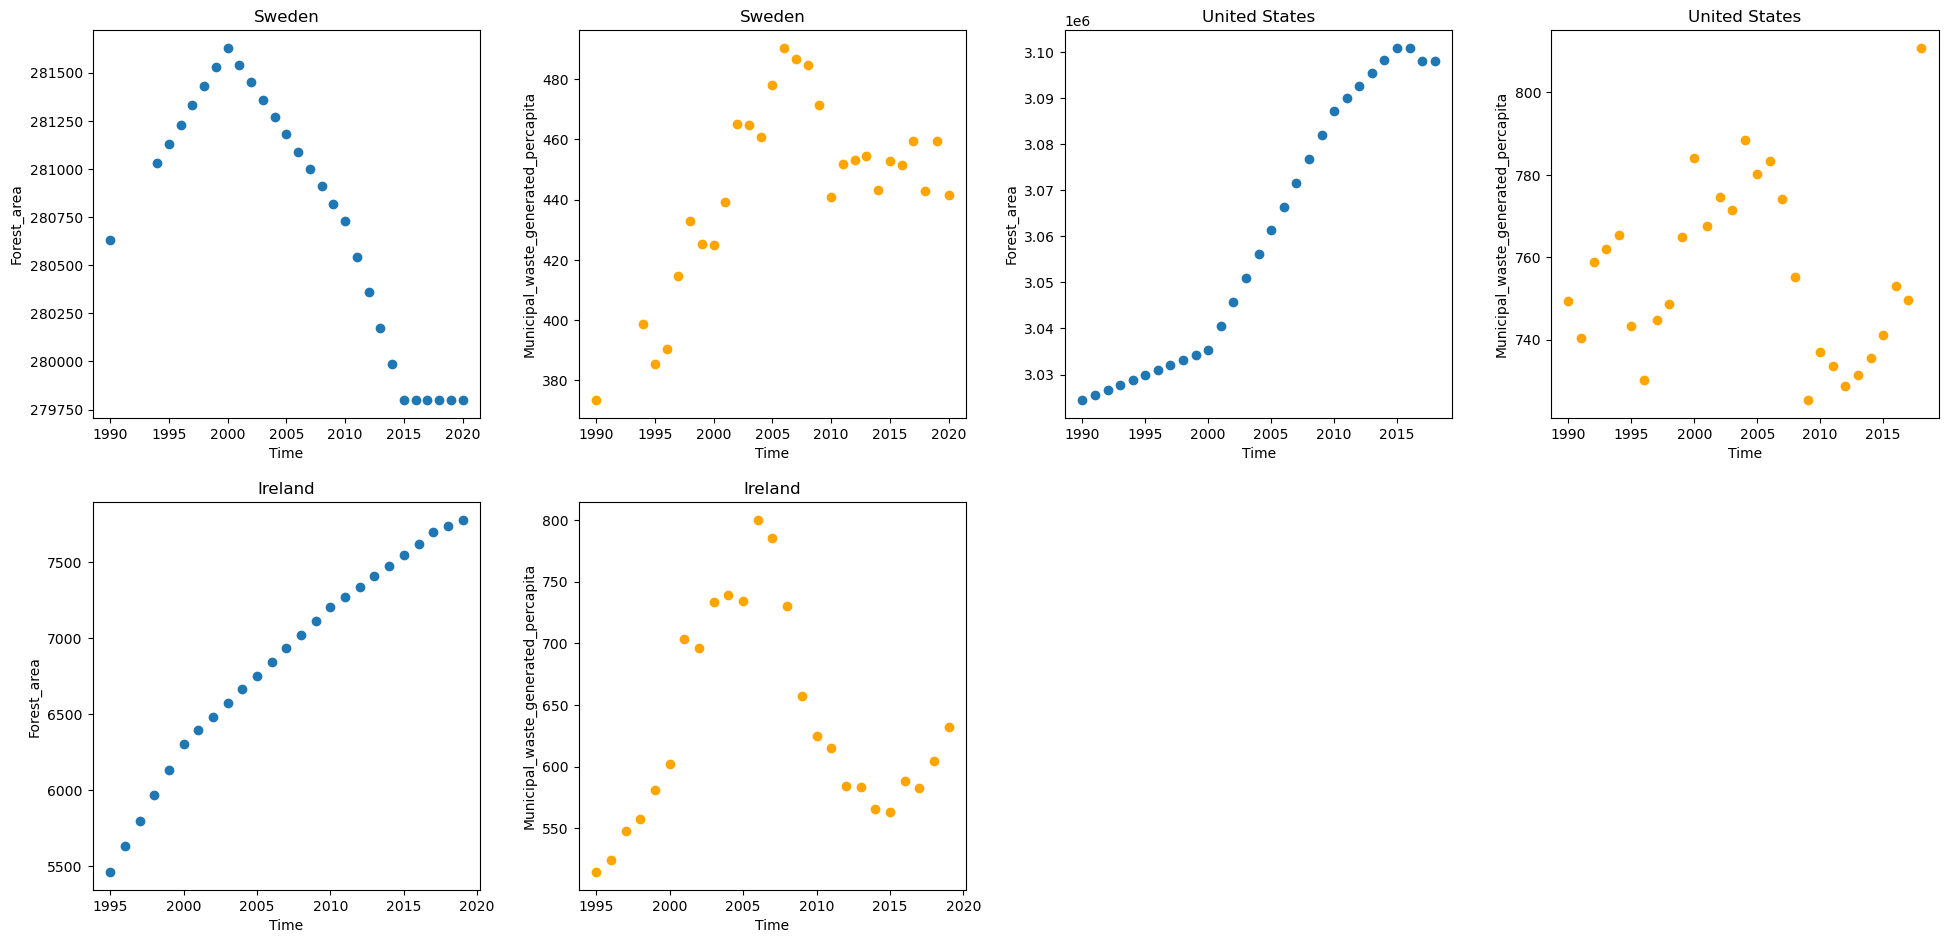

In [68]:
fig, axs = hyp.group_time_series_hyp3(df1, corr_list3, (20,10))
plt.show()

In [69]:
corr_list3

[['Sweden', -0.14839984061899697],
 ['United States', -0.1602115177906036],
 ['Ireland', 0.12634072411233208]]

#### References and Citation for Code

1]https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm#:~:text=Correlation%20coefficients%20whose%20magnitude%20are%20between%200.5%20and%200.7%20indicate,which%20have%20a%20low%20correlation.<br>